## 3D Houses - Plot a single shape file

Import the necessary libraries

In [2]:
conda list


# packages in environment at C:\Users\ecebo\anaconda3\envs\houses_3d:
#
# Name                    Version                   Build  Channel
affine                    2.3.0              pyhd3eb1b0_0  
anyio                     2.2.0            py37haa95532_2  
argcomplete               1.12.3             pyhd3eb1b0_0  
argon2-cffi               20.1.0           py37h2bbff1b_1  
async_generator           1.10             py37h28b3542_0  
attrs                     21.2.0             pyhd3eb1b0_0  
aws-c-common              0.4.57               ha925a31_1  
aws-c-event-stream        0.1.6                hd77b12b_5  
aws-checksums             0.1.9                ha925a31_0  
aws-sdk-cpp               1.8.185              hd77b12b_0  
babel                     2.9.1              pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
beautifulsoup4            4.10.0             pyh06a4308_0  
blas                      1.0                         mkl  
bleach               

shapely                   1.7.1            py37h06580b3_0  
six                       1.16.0             pyhd3eb1b0_0  
sniffio                   1.2.0            py37haa95532_1  
snuggs                    1.4.7              pyhd3eb1b0_0  
soupsieve                 2.2.1              pyhd3eb1b0_0  
sqlite                    3.36.0               h2bbff1b_0  
terminado                 0.9.4            py37haa95532_0  
testpath                  0.5.0              pyhd3eb1b0_0  
threadpoolctl             2.2.0              pyh0d69192_0  
tiledb                    2.2.9                hf7ce2e6_0  
tk                        8.6.11               h2bbff1b_0  
tornado                   6.1              py37h2bbff1b_0  
traitlets                 5.1.0              pyhd3eb1b0_0  
typing_extensions         3.10.0.2           pyh06a4308_0  
urllib3                   1.26.7             pyhd3eb1b0_0  
vc                        14.2                 h21ff451_1  
vs2015_runtime            14.27.29016   

In [1]:
import os
import sys

In [2]:
sys.executable

'C:\\Users\\ecebo\\anaconda3\\envs\\houses_3d\\python.exe'

In [3]:
import rasterio
import fiona
import geopandas
import gdal

import matplotlib.pyplot as plt
import numpy
from mpl_toolkits.mplot3d import Axes3D

In [4]:
from rasterio.plot import show

In [5]:
import numpy as np

Dataset path

In [6]:
data_main_folder_path = os.path.abspath("./data/")

selected_DTM_folder_name = 'DHMVIIDTMRAS1m_k01'
selected_DSM_folder_name = 'DHMVIIDSMRAS1m_k01'

DHM_folder_name = 'DHMVII_vdc_k01'
GeoTIFF_folder_name = 'GeoTIFF'

In [7]:
# DSM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)

In [8]:
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\GeoTIFF\\DHMVIIDSMRAS1m_k01.tif'

In [35]:
# img = rasterio.open('zip+file:///C://Users/ecebo/MyRepos/3D_houses/Data/DHMVIIDSMRAS1m_k01.zip!/GeoTIFF/DHMVIIDSMRAS1m_k01.tif')


RasterioIOError: '/vsizip//C://Users/ecebo/MyRepos/3D_houses/Data/DHMVIIDSMRAS1m_k01.zip/GeoTIFF/DHMVIIDSMRAS1m_k01.tif' does not exist in the file system, and is not recognized as a supported dataset name.

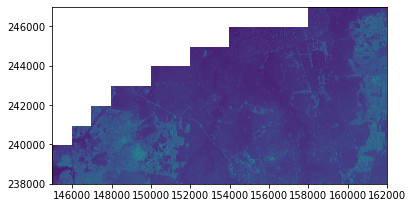

<AxesSubplot:>

In [10]:
img = rasterio.open(file_path)
rasterio.plot.show(img)

In [11]:
print(img.count)
print(img.height, img.width)
print(img.crs)

1
9000 17000
EPSG:31370


In [12]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [13]:
help(img.crs.get)

Help on method get in module collections.abc:

get(key, default=None) method of rasterio.crs.CRS instance
    D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.



In [14]:
img.crs.wkt

'PROJCS["Belge 1972 / Belgian Lambert 72",GEOGCS["Belge 1972",DATUM["Reseau_National_Belge_1972",SPHEROID["International 1924",6378388,297,AUTHORITY["EPSG","7022"]],TOWGS84[-106.869,52.2978,-103.724,0.3366,-0.457,1.8422,-1.2747],AUTHORITY["EPSG","6313"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4313"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",90],PARAMETER["central_meridian",4.36748666666667],PARAMETER["standard_parallel_1",51.1666672333333],PARAMETER["standard_parallel_2",49.8333339],PARAMETER["false_easting",150000.013],PARAMETER["false_northing",5400088.438],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","31370"]]'

In [15]:
img.transform

Affine(1.0, 0.0, 145000.0,
       0.0, -1.0, 247000.0)

In [16]:
transform_array = np.array([[img.transform.a,img.transform.b,img.transform.c],[img.transform.d,img.transform.e,img.transform.f],[img.transform.g,img.transform.h,img.transform.i]])
transform_array

array([[ 1.00e+00,  0.00e+00,  1.45e+05],
       [ 0.00e+00, -1.00e+00,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [17]:
transform_inverted = np.linalg.inv(transform_array)
transform_inverted

array([[ 1.00e+00,  0.00e+00, -1.45e+05],
       [-0.00e+00, -1.00e+00,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [18]:
coordinates = np.array([145000.0,238000.0,1])

transform_inverted*coordinates.transpose()

array([[ 1.45e+05,  0.00e+00, -1.45e+05],
       [-0.00e+00, -2.38e+05,  2.47e+05],
       [ 0.00e+00,  0.00e+00,  1.00e+00]])

In [19]:
img.transform.determinant

-1.0

In [20]:
help(rasterio.transform)


Help on module rasterio.transform in rasterio:

NAME
    rasterio.transform - Geospatial transforms

CLASSES
    builtins.object
        TransformMethodsMixin
    
    class TransformMethodsMixin(builtins.object)
     |  Mixin providing methods for calculations related
     |  to transforming between rows and columns of the raster
     |  array and the coordinates.
     |  
     |  These methods are wrappers for the functionality in
     |  `rasterio.transform` module.
     |  
     |  A subclass with this mixin MUST provide a `transform`
     |  property.
     |  
     |  Methods defined here:
     |  
     |  index(self, x, y, op=<built-in function floor>, precision=None)
     |      Returns the (row, col) index of the pixel containing (x, y) given a
     |      coordinate reference system.
     |      
     |      Use an epsilon, magnitude determined by the precision parameter
     |      and sign determined by the op function:
     |          positive for floor, negative for ceil.


In [21]:
img.transform.TransformMethodsMixin.index()

AttributeError: 'Affine' object has no attribute 'TransformMethodsMixin'

In [22]:
help(rasterio.transform.TransformMethodsMixin.index)

Help on function index in module rasterio.transform:

index(self, x, y, op=<built-in function floor>, precision=None)
    Returns the (row, col) index of the pixel containing (x, y) given a
    coordinate reference system.
    
    Use an epsilon, magnitude determined by the precision parameter
    and sign determined by the op function:
        positive for floor, negative for ceil.
    
    Parameters
    ----------
    x : float
        x value in coordinate reference system
    y : float
        y value in coordinate reference system
    op : function, optional (default: math.floor)
        Function to convert fractional pixels to whole numbers (floor,
        ceiling, round)
    precision : int, optional (default: None)
        Decimal places of precision in indexing, as in `round()`.
    
    Returns
    -------
    tuple
        (row index, col index)



In [23]:
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 247000.0)) # left top
print(rasterio.transform.TransformMethodsMixin.index(img, 145000.0, 238000.0)) # left bottom
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 247000.0)) # right top
print(rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)) # right bottom
print('\n')
print(rasterio.transform.TransformMethodsMixin.index(img, 150000.0, 244000.0))

(0, 0)
(9000, 0)
(0, 17000)
(9000, 17000)


(3000, 5000)


In [24]:
print(img.nodatavals)
img.nodata

(-9999.0,)


-9999.0

In [25]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [26]:
mask = img.read_masks(1)

In [27]:
print(img.colormap)

<built-in method colormap of DatasetReader object at 0x00000242AA792C48>


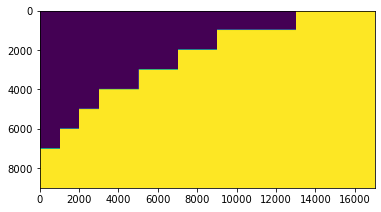

In [28]:
plt.imshow(mask)
plt.show()

In [29]:
layer = img.read(1)

In [30]:
layer.shape

(9000, 17000)

In [31]:
layer

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,  1.279e+01,
         1.280e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,  1.281e+01,
         1.284e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,  1.283e+01,
         1.288e+01],
       ...,
       [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,  1.693e+01,
         1.690e+01],
       [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,  1.691e+01,
         1.695e+01],
       [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,  1.688e+01,
         1.691e+01]], dtype=float32)

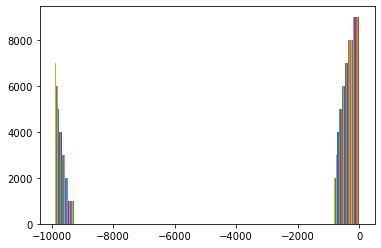

In [32]:
plt.hist(layer)
plt.show()

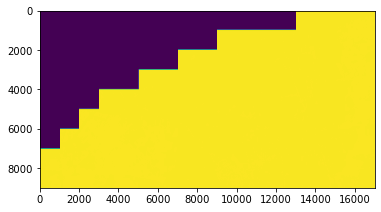

In [33]:
plt.imshow(layer)
plt.show()

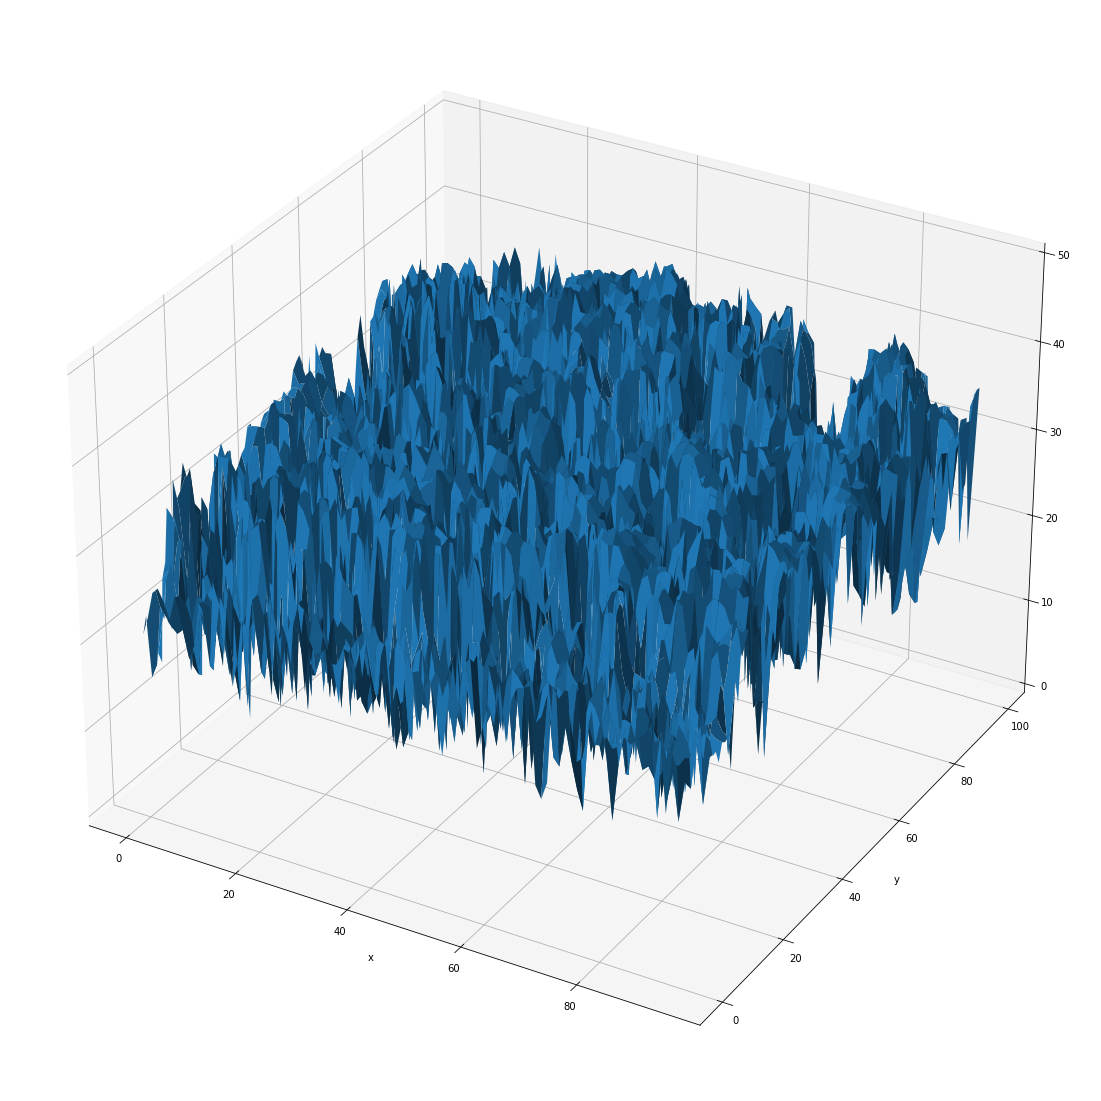

In [36]:
# Plot a subset of the layer as a 3D image
layer_slice = layer[7000:7200,11000:11100]
layer_slice = layer[6000:6100, 6010:6105]


nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [37]:
map_transform = img.get_transform()
map_transform

[145000.0, 1.0, 0.0, 247000.0, 0.0, -1.0]

In [38]:
map_shape = img.shape
map_shape

(9000, 17000)

In [39]:
xMin = map_transform[0]
yMin = map_transform[3]
xMax = xMin + map_shape[1] / map_transform[1]
yMax = yMin + map_shape[0] / map_transform[5]
xMin, yMin, xMax, yMax

(145000.0, 247000.0, 162000.0, 238000.0)

In [40]:
img.bounds

BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

In [41]:
rasterio.transform.TransformMethodsMixin.index(img, 162000.0, 238000.0)

(9000, 17000)

In [42]:
layers = img.read()
layers

array([[[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.275e+01,
          1.279e+01,  1.280e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.280e+01,
          1.281e+01,  1.284e+01],
        [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.284e+01,
          1.283e+01,  1.288e+01],
        ...,
        [ 4.520e+00,  4.550e+00,  4.570e+00, ...,  1.680e+01,
          1.693e+01,  1.690e+01],
        [ 4.490e+00,  4.570e+00,  4.580e+00, ...,  1.691e+01,
          1.691e+01,  1.695e+01],
        [ 4.480e+00,  4.550e+00,  4.570e+00, ...,  1.687e+01,
          1.688e+01,  1.691e+01]]], dtype=float32)

In [43]:
layers.shape

(1, 9000, 17000)

In [44]:
# DTM TIFF file
folder_path = os.path.join(data_main_folder_path, selected_DTM_folder_name, GeoTIFF_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[0]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDTMRAS1m_k01\\GeoTIFF\\DHMVIIDTMRAS1m_k01.tif'

In [45]:
# Read DSM file
img_DSM = rasterio.open(file_path)


In [46]:
layer_DSM = img_DSM.read(1)

In [47]:
layer.shape

(9000, 17000)

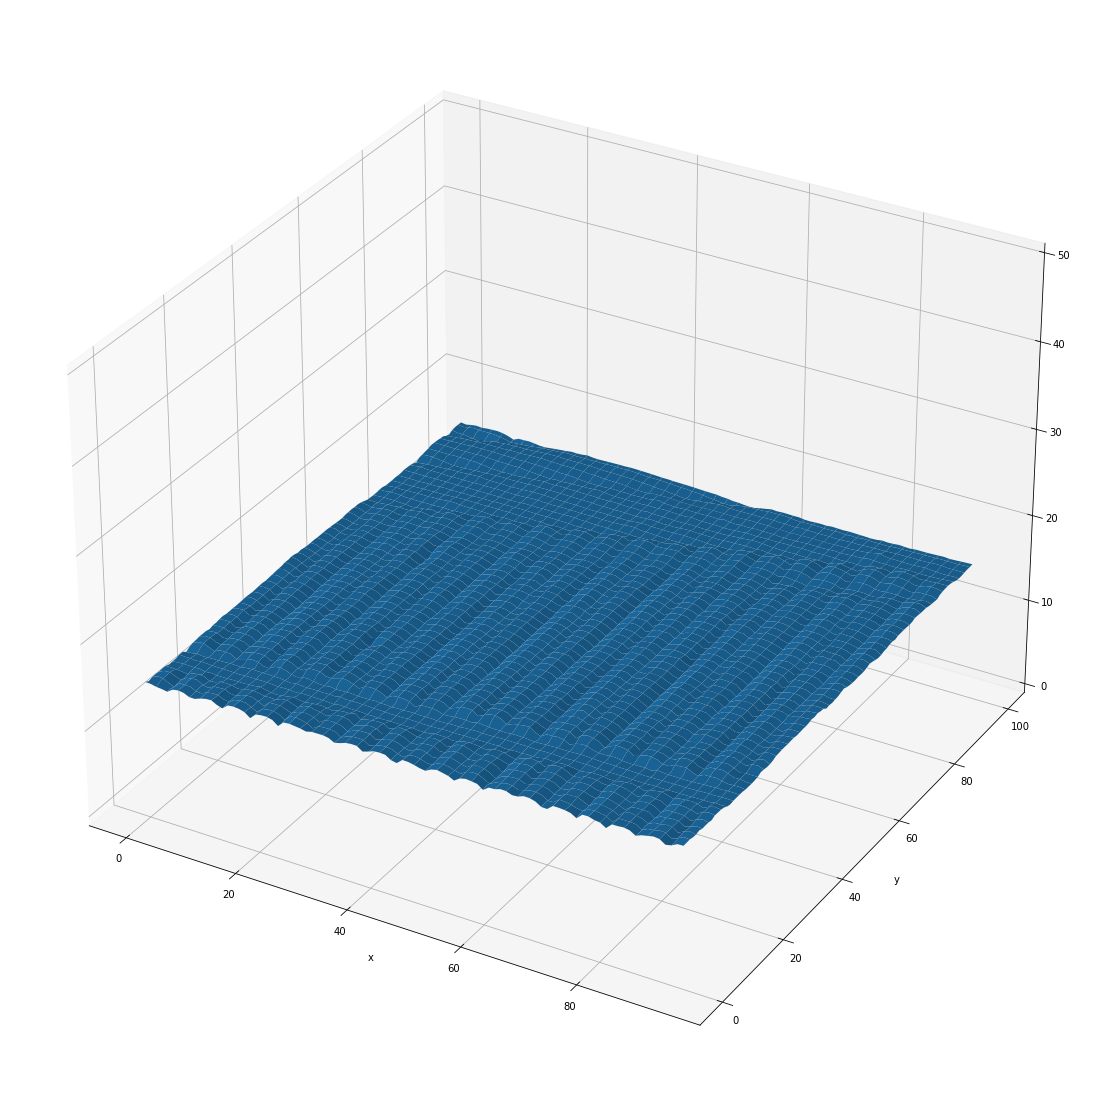

In [48]:
# Plot a subset of the layer as a 3D image
layer_slice = layer_DSM[7000:7200,11000:11100]
layer_slice = layer_DSM[6000:6100, 6010:6105]


nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [49]:
chm = layer-layer_DSM

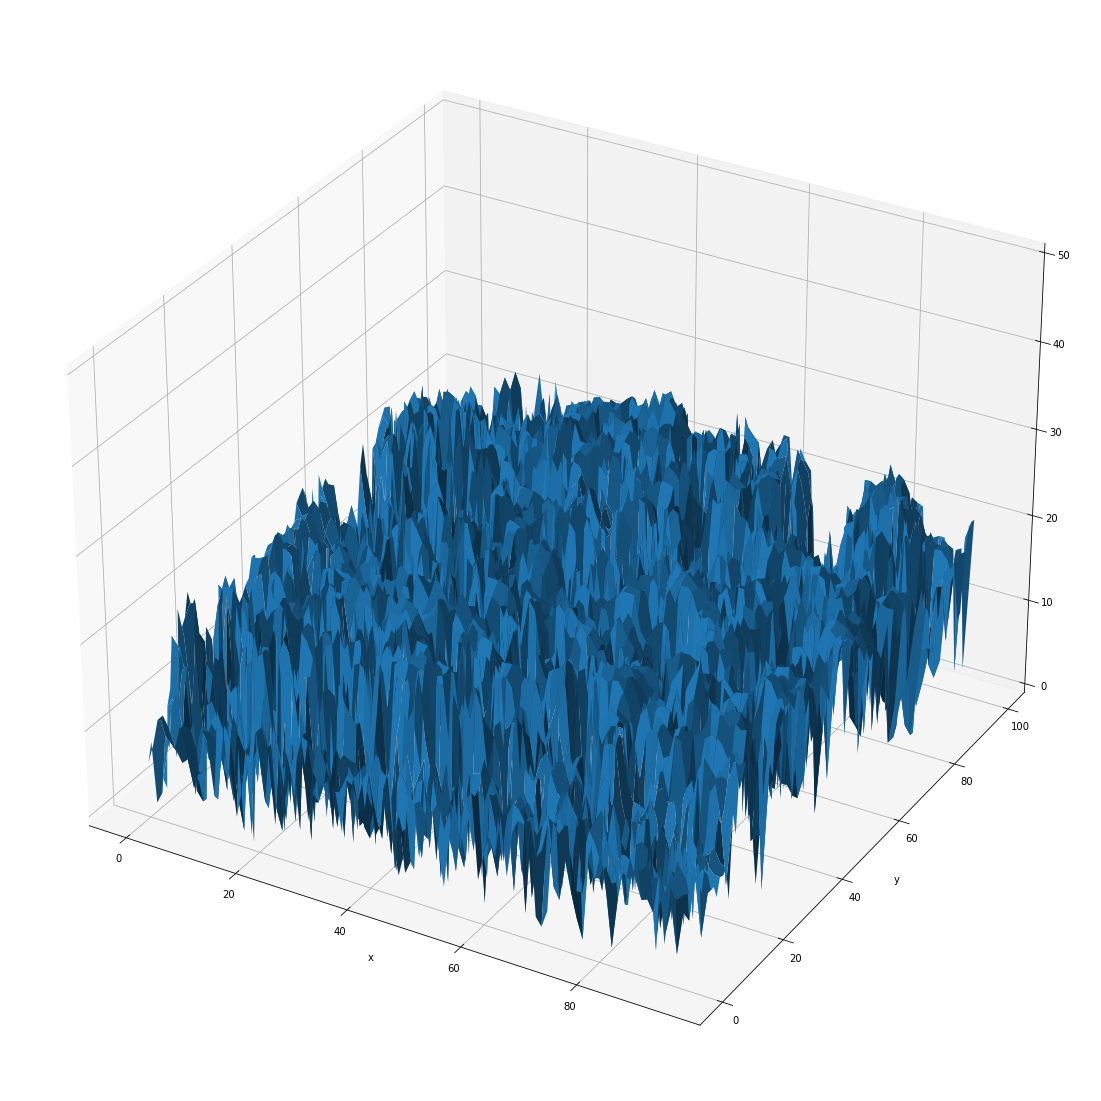

In [50]:
# Plot a subset of the layer as a 3D image
layer_slice = chm[7000:7200,11000:11100]
layer_slice = chm[6000:6100, 6010:6105]


nx = layer_slice.shape[1]
ny = layer_slice.shape[0]
x = range(nx)
y = range(ny)

X, Y = numpy.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D


hf = plt.figure(figsize=(20,20))
ha = hf.add_subplot(111, projection='3d')

ha.plot_surface(X, Y, layer_slice)
ha.set_zlim(0, 50)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [65]:
# Shape file
folder_path = os.path.join(data_main_folder_path, selected_DSM_folder_name, DHM_folder_name)
file_name = os.listdir(folder_path)
file_name = file_name[4]
file_path = os.path.join(folder_path, file_name)
file_path

'C:\\Users\\ecebo\\MyRepos\\3D_houses\\data\\DHMVIIDSMRAS1m_k01\\DHMVII_vdc_k01\\DHMVII_vdc_k01.shp'

In [66]:
# Read shape file
shapes_gp = geopandas.read_file(file_path)
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


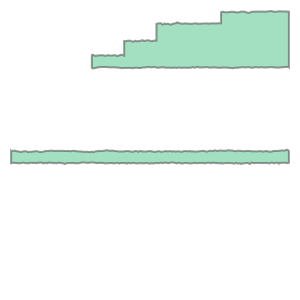

In [70]:
shapes_gp.geometry[0]

In [54]:
help(shapes_gp)

Help on GeoDataFrame in module geopandas.geodataframe object:

class GeoDataFrame(geopandas.base.GeoPandasBase, pandas.core.frame.DataFrame)
 |  GeoDataFrame(*args, geometry=None, crs=None, **kwargs)
 |  
 |  A GeoDataFrame object is a pandas.DataFrame that has a column
 |  with geometry. In addition to the standard DataFrame constructor arguments,
 |  GeoDataFrame also accepts the following keyword arguments:
 |  
 |  Parameters
 |  ----------
 |  crs : value (optional)
 |      Coordinate Reference System of the geometry objects. Can be anything accepted by
 |      :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
 |      such as an authority string (eg "EPSG:4326") or a WKT string.
 |  geometry : str or array (optional)
 |      If str, column to use as geometry. If array, will be set as 'geometry'
 |      column on GeoDataFrame.
 |  
 |  Examples
 |  --------
 |  Constructing GeoDataFrame from a dictionary.
 |  
 |  >>> from shapely.geometry import Point
 |  >>> 

In [55]:
shapes_gp.geometry

0    MULTIPOLYGON Z (((162079.010 238604.770 0.000,...
1    POLYGON Z ((148803.300 243432.780 0.000, 14882...
2    MULTIPOLYGON Z (((156554.470 243736.800 0.000,...
Name: geometry, dtype: geometry

<AxesSubplot:>

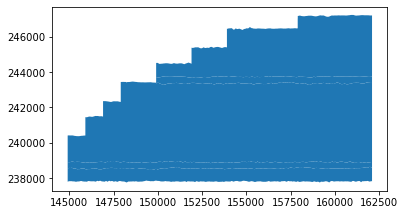

In [56]:
shapes_gp.plot()

In [57]:
shapes_gp

,Id,OpnDatum1,OpnDatum2,geometry
0,0,2013-02-20,None,"MULTIPOLYGON Z (((162079.010 238604.770 0.000,..."
1,0,2013-04-01,None,"POLYGON Z ((148803.300 243432.780 0.000, 14882..."
2,0,2013-02-20,2013-04-01,"MULTIPOLYGON Z (((156554.470 243736.800 0.000,..."


In [61]:
# import rioxarray
# import geopandas as gpd
# import matplotlib.pyplot as plt
# import pandas as pd

# shapefiles
# point_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HARVtower_UTM18N.shp")
# lines_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HARV_roads.shp")
# aoi_boundary_HARV = read_file("data/NEON-DS-Site-Layout-Files/HARV/HarClip_UTMZ18.shp")

# CHM
# CHM_HARV = rioxarray.open("data/NEON-DS-Airborne-Remote-Sensing/HARV/CHM/HARV_chmCrop.tif")

# plot_locations_HARV = pd.read_csv("data/NEON-DS-Site-Layout-Files/HARV/HARV_PlotLocations.csv")
# plot_locations_HARV = gpd.GeoDataFrame(plot_locations_HARV, 
#                     geometry=gpd.points_from_xy(plot_locations_HARV.easting, plot_locations_HARV.northing), 
#                     crs=CHM_HARV.rio.crs) 

ModuleNotFoundError: No module named 'rioxarray'

In [1]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("test.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

ModuleNotFoundError: No module named 'shapefile'